In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [40]:
df=pd.read_csv("cr_loan2.csv")
df.reset_index(inplace=True)
print(df.columns)

indices=df[df['person_emp_length'].isnull()].index
df.drop(indices,inplace=True)

df['loan_percent_income']=df['loan_percent_income'].astype('float')
df['loan_amnt']=df['loan_amnt'].astype('float')
df['person_income']=df['person_income'].astype('float')
df['loan_int_rate']=df['loan_int_rate'].astype('float')
df['loan_intent']=df['loan_intent'].astype(str)
df['loan_grade']=df['loan_grade'].astype(str)

filter=(df['person_emp_length']<40) & (df['person_income']<500000)
df=df[filter]


df['age_type']=df['person_age'].apply(lambda row: "teenager" if (row<20)
                                     else "young adult" if (row>=20) & (row<30)
                                    else "adult" if (row>=30) & (row < 50)
                                      else "senior"
                                     )

#encoder=LabelEncoder()
#df["person_home_ownership_enc"]=encoder.fit_transform(df["person_home_ownership"])
#df["loan_grade_enc"]=encoder.fit_transform(df["loan_grade"])
#df["cb_person_default_on_file_enc"]=encoder.fit_transform(df["cb_person_default_on_file"])

cred_num  =df.select_dtypes(exclude=['object'])
cred_cat = df.select_dtypes(include=['object'])
ohe=pd.get_dummies(cred_cat)
df=pd.concat([df,ohe],axis=1)

print(df.columns)

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_type',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F

In [41]:
interest_rate=df['loan_int_rate'].mean()
#print(interest_rate)
indices=df[df['loan_int_rate'].isnull()].index
filter=df.index.isin(indices)
indices=df['loan_int_rate'][filter].index

df.loc[indices,'loan_int_rate']=float(interest_rate)
#print(df[df['loan_int_rate']>=interest_rate])

In [42]:
print(df['person_home_ownership'].unique())
indices=df[df['person_home_ownership'].isnull()].index
df['person_home_ownership'][indices]='OTHER'

['OWN' 'MORTGAGE' 'RENT' 'OTHER']


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


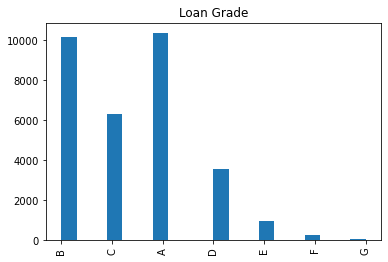

In [43]:
plt.hist(x=df['loan_grade'],bins=20)
plt.xticks(rotation=90)
plt.title("Loan Grade")
plt.show()

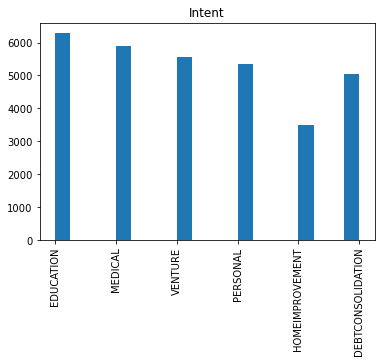

In [44]:
plt.hist(x=df['loan_intent'],bins=20)
plt.xticks(rotation=90)
plt.title("Intent")
plt.show()
#, 'loan_grade'

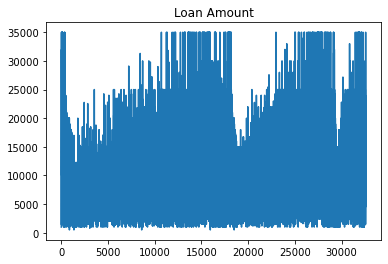

In [45]:
df['loan_amnt'].plot()
plt.title('Loan Amount')
plt.show()

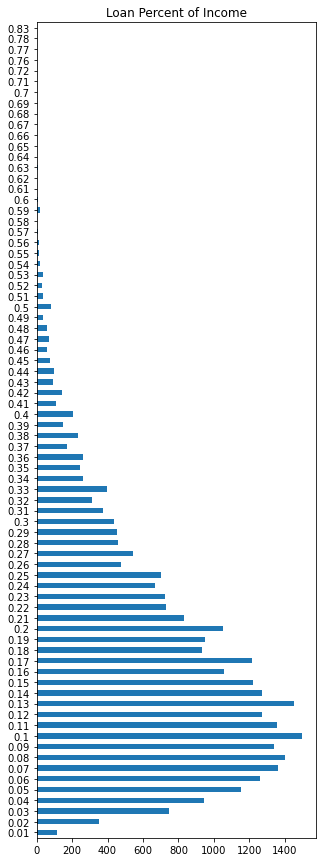

In [46]:
plt.figure(figsize=(5,15))
df['loan_percent_income'].value_counts().sort_index().plot(kind='barh')
plt.title('Loan Percent of Income')
plt.show()

In [47]:
print("Credit risk is the possiblity that the borrow will not repay the loan")

Credit risk is the possiblity that the borrow will not repay the loan


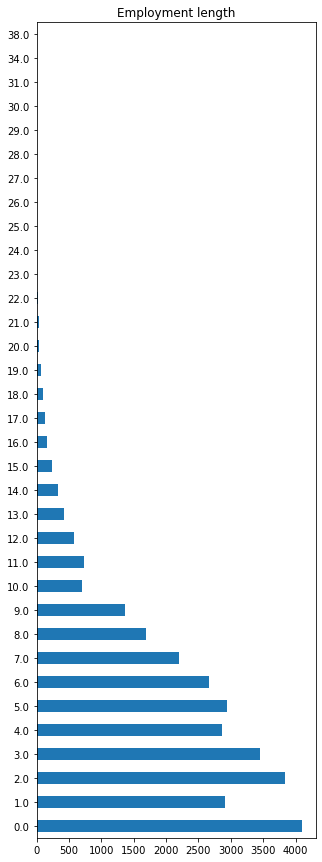

In [48]:
plt.figure(figsize=(5,15))
df['person_emp_length'].value_counts().sort_index().plot(kind='barh')
plt.title("Employment length")
plt.show()

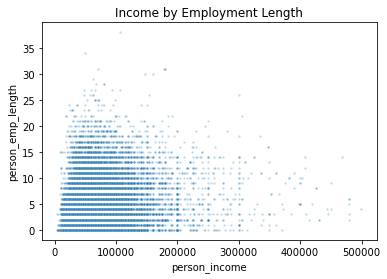

In [49]:
sns.scatterplot(x='person_income',y='person_emp_length',data=df,alpha=0.3,s=5)
plt.title('Income by Employment Length')
plt.show()

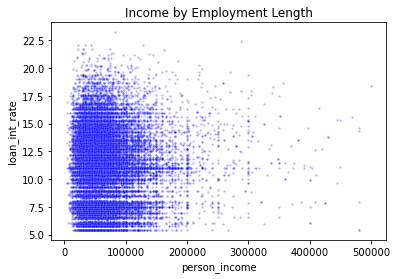

In [50]:
sns.scatterplot(x='person_income',y='loan_int_rate',color="blue", data=df,alpha=0.3,s=5)
plt.title('Income by Employment Length')
plt.show()

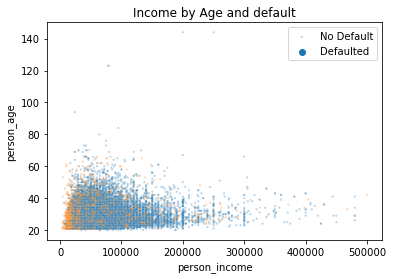

Ages 30 to 50 have higher incomes. Afterwhich incomes drop off in frequency


In [51]:
colors=['red','green']
sns.scatterplot(x='person_income',y='person_age',hue=df['loan_status'], 
                cmap = ListedColormap(colors),
                data=df,alpha=0.3,s=5)
plt.title('Income by Age and default')
plt.legend(['No Default', 'Defaulted'])
plt.show()

print("Ages 30 to 50 have higher incomes. Afterwhich incomes drop off in frequency")

<Figure size 432x288 with 0 Axes>

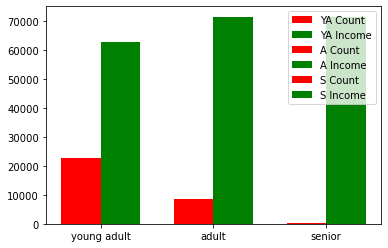

young adult (20-29) adult (30-49), senior (50-)


In [52]:
age_types=['young adult','adult','senior']
grouped=df.groupby('age_type')['person_income'].count()
grouped2=df.groupby('age_type')['person_income'].mean()

young_adult_count=(grouped['young adult'])
young_adult_income=(grouped2['young adult'])

adult_count=(grouped['adult'])
adult_income=(grouped2['adult'])

senior_count=(grouped['senior'])
senior_income=(grouped2['senior'])


plt.clf()
bar_width=.35
index=np.arange(len(age_types))
fig,ax=plt.subplots()
ya_count_bar=ax.bar(index[0]-(bar_width/2),young_adult_count,bar_width,label="YA Count",color='red')
ya_income_ba=ax.bar(index[0]+(bar_width/2),young_adult_income,bar_width,label="YA Income",color='green')

a_count_bar=ax.bar(index[1]-(bar_width/2),adult_count,bar_width,label="A Count",color='red')
a_income_ba=ax.bar(index[1]+(bar_width/2),adult_income,bar_width,label="A Income",color='green')

s_count_bar=ax.bar(index[2]-(bar_width/2),senior_count,bar_width,label="S Count",color='red')
s_income_ba=ax.bar(index[2]+(bar_width/2),senior_income,bar_width,label="S Income",color='green')

ax.set_xticks(index)
ax.set_xticklabels(age_types)

#plt.bar(grouped.index,grouped.values,label="Count",color='red')
#plt.bar(grouped2.index,grouped2.values,label="Avg Income", color="green")
plt.legend()

#plt.legend(['young adult (20-29)','adult (30-49), senior (50-)'])
plt.show()
print('young adult (20-29)','adult (30-49), senior (50-)')

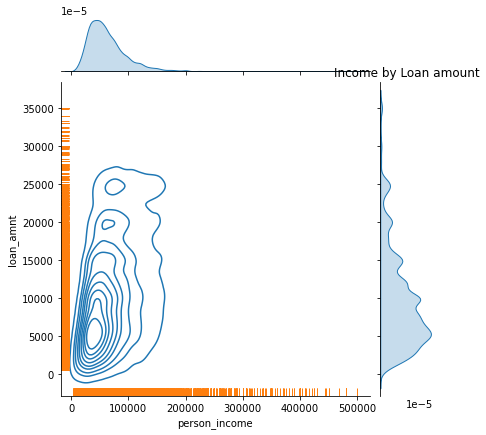

In [53]:
g=sns.JointGrid(data=df, x='person_income', y='loan_amnt')
g=g.plot_joint(sns.kdeplot)
g=g.plot_joint(sns.rugplot)
g=g.plot_marginals(sns.kdeplot,shade=True)
plt.title("Income by Loan amount")
plt.show()

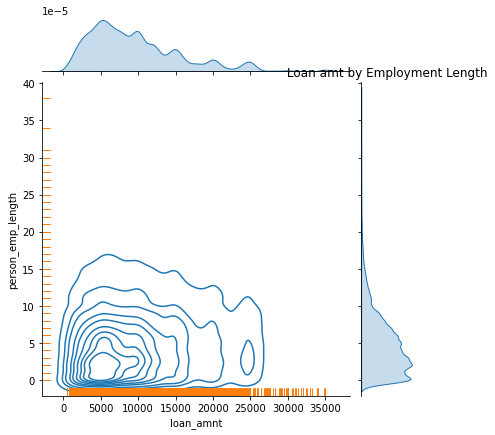

In [54]:
g=sns.JointGrid(data=df, x='loan_amnt', y='person_emp_length')
g=g.plot_joint(sns.kdeplot)
g=g.plot_joint(sns.rugplot)
g=g.plot_marginals(sns.kdeplot,shade=True)
plt.title("Loan amt by Employment Length")
plt.show()

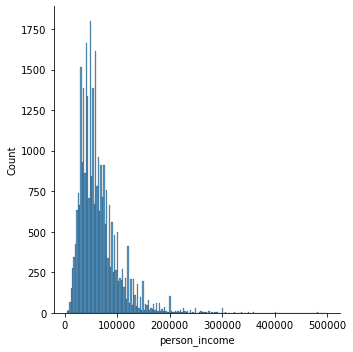

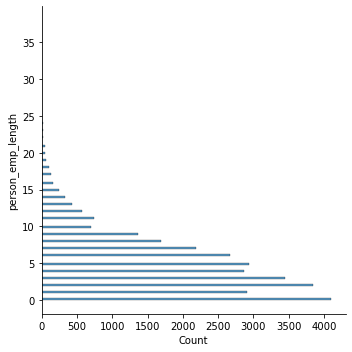

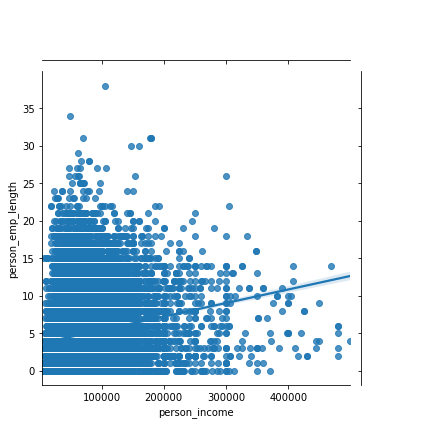

In [55]:
g=sns.JointGrid(data=df, x='person_income', y='person_emp_length')
#g=g.plot_joint(sns.kdeplot)
#g=g.plot_marginals(sns.kdeplot,shade=True)
g.plot(sns.regplot, sns.displot)
plt.show()

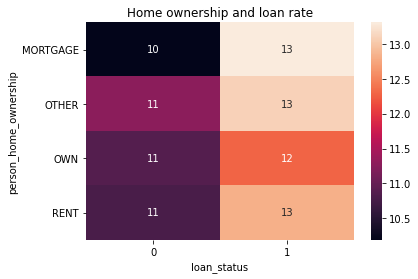

In [56]:
ct=pd.crosstab(df['person_home_ownership'],df['loan_status'],values=df['loan_int_rate'], aggfunc='mean').round(2)
sns.heatmap(ct,annot=True)
plt.title("Home ownership and loan rate")
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='loan_intent'>

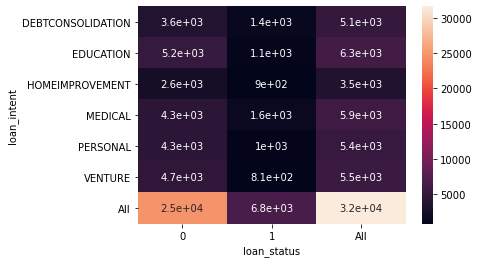

In [57]:
# Create a cross table of the loan intent and loan status
ct=(pd.crosstab(df["loan_intent"], df["loan_status"], margins = True))
sns.heatmap(ct,annot=True)

<AxesSubplot:xlabel='loan_status', ylabel='person_home_ownership'>

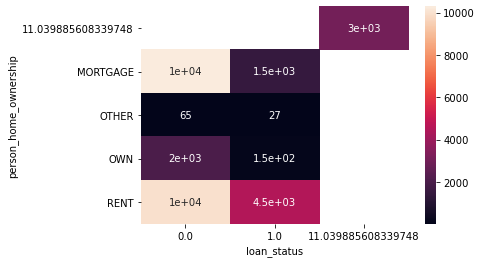

In [336]:
ct=(pd.crosstab(df["person_home_ownership"], df["loan_status"],df["loan_grade"],aggfunc='count'))
sns.heatmap(ct,annot=True)

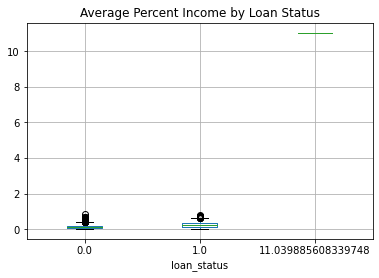

The average percentage of income for defaults is higher


In [337]:
df.boxplot(column = ["loan_percent_income"], by = "loan_status")
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

print("The average percentage of income for defaults is higher")

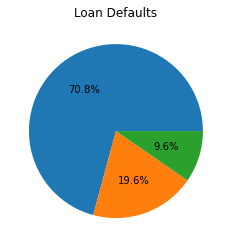

In [338]:
plt.pie(df['loan_status'].value_counts(),autopct='%1.1f%%')
plt.title('Loan Defaults')
plt.show()


In [59]:
pipeline = Pipeline([
    ('std', StandardScaler),
    #('lr', LogisticRegression(solver='lbfgs',penalty='l2',C=100))
    ('lr', LogisticRegression(solver='lbfgs',penalty='l2',C=1,tol=0.01))
])

In [60]:
COLUMNS=[x for x in df.select_dtypes(exclude=['object']).columns if x!="loan status"]
print(COLUMNS)
X=df[COLUMNS]

y=df['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=123)
pipeline['lr'].fit(X_train,y_train)


['index', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N', 'cb_person_default_on_file_Y', 'age_type_adult', 'age_type_senior', 'age_type_young adult']


LogisticRegression(C=1, tol=0.01)

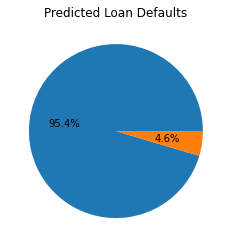

In [61]:
y_pred_prob=pipeline['lr'].predict_proba(X_test)

predictions=pipeline['lr'].predict(X_test)

plt.pie(pd.Series(predictions).value_counts(),autopct='%1.1f%%')
plt.title('Predicted Loan Defaults')
plt.show()


In [62]:
# Function to sort the list by second item of tuple
def Sort_Tuple(tup):
    tup.sort(key = lambda x: float(x[1]), reverse=True)
    return tup

print("Parameters",pipeline['lr'].get_params())
print("Intercept",pipeline['lr'].intercept_)
#print(pipeline['lr'].coef_)

print('\ncoefficients tell us the importance of each feature\n')

feature_coefficients=list(zip(COLUMNS,pipeline['lr'].coef_.T.flatten()))
for feature, coefficient in Sort_Tuple(feature_coefficients):
    print(feature,coefficient)

Parameters {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.01, 'verbose': 0, 'warm_start': False}
Intercept [-2.45499474e-09]

coefficients tell us the importance of each feature

loan_amnt 0.00011395627881870008
loan_int_rate 1.194705778033628e-07
loan_status 5.8572085824775675e-08
loan_grade_D 1.526594639883472e-08
person_home_ownership_RENT 1.1291834220560664e-08
cb_person_default_on_file_Y 9.803476702615497e-09
loan_grade_E 4.483132040627426e-09
cb_person_cred_hist_length 3.579361827103713e-09
loan_intent_DEBTCONSOLIDATION 3.4640059624276114e-09
loan_percent_income 2.9253916772008816e-09
loan_intent_HOMEIMPROVEMENT 2.66921172665767e-09
loan_intent_MEDICAL 2.605184589687299e-09
loan_grade_F 1.4439752067615329e-09
loan_grade_G 5.51958686448942e-10
age_type_senior 3.605072305285661e-10
age_type_adult 1